In this jupyter notebook we will compare the performance of two portfolios. Portfolio 1 is composed by three stocks of tech companies in which two of them are involved in the 5G competition (Nokia and Ericsson). The other stock that conforms Portfolio 1 is Square related with payments technologies. Portfolio 2 is composed of the carmaker Daimlergroup, cloud services company Oracle and the energy company Repsol. The weights of each stock in each of the portfolios is equally distributed so each stock represents 33% of its portfolio.

The data will be imported from yahoo finance. We will focus on a big timelapse, from 2017 up to now in order to see the performance 
of the past years and the impact of the pandemic.

The first step is to import the data and transform it into the desire format and shape. We can get the historical data of the stocks
by using their ticker in yahoo api.

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime
tickers=['SQ','NOK','ERIC']
startdate=datetime.datetime(2017,1,1)
enddate=datetime.datetime(2020,8,15)
def get(tickers,startdate,enddate):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,start=startdate,end=enddate))
    datas=map(data,tickers)
    return(pd.concat(datas,keys=tickers,names=['Ticker','Date']))





In [2]:
portfolio1=get(tickers,startdate,enddate)

In [3]:
import pandas as pd
import pandas_datareader as pdr
import datetime
tickers2=['DAI.DE','ORCL','REP.MC']
startdate=datetime.datetime(2017,1,1)
enddate=datetime.datetime(2020,8,15)
def get(tickers,startdate,enddate):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,start=startdate,end=enddate))
    datas=map(data,tickers)
    return(pd.concat(datas,keys=tickers,names=['Ticker','Date']))

In [4]:
portfolio2=get(tickers2,startdate,enddate)

Now that we have imported the data it is interesting to have a look on the structure to have an idea of the changes required.

In [5]:
portfolio1.head()

High     Low   Open  Close     Volume  Adj Close
Ticker Date                                                          
SQ     2017-01-03  14.015  13.660  13.82  13.81  3363900.0      13.81
       2017-01-04  14.260  13.725  13.86  14.25  4977400.0      14.25
       2017-01-05  14.610  14.010  14.25  14.56  5779800.0      14.56
       2017-01-06  15.075  14.530  14.56  15.00  6382200.0      15.00
       2017-01-09  15.195  14.850  14.98  15.06  4960200.0      15.06

Our datasets are composed of 6 different fields and two indexes (Date and Ticker). We are just interested in the Adjusted Close column and both indexes. In order to get to that structure we need to create a pivot table. Our final objective is a dataset with date as the index and the adjusted close of each company stock in a separate column.

In [6]:
portfolio1=portfolio1.pivot_table(values='Adj Close',index='Date',columns='Ticker')
portfolio2=portfolio2.pivot_table(values='Adj Close',index='Date',columns='Ticker')
portfolio1=portfolio1.dropna()
portfolio2=portfolio2.dropna()


Now that the changes are made our datasets looks in the following way. A pairplot is included in order to see how stocks in each portfolio are related to each other.

In [7]:
portfolio1.head()

Ticker,ERIC,NOK,SQ
Date,,,
2017-01-03,5.450054,4.361909,13.81
2017-01-04,5.553775,4.425921,14.25
2017-01-05,5.534917,4.480788,14.56
2017-01-06,5.534917,4.499076,15.00
2017-01-09,5.534917,4.416776,15.06


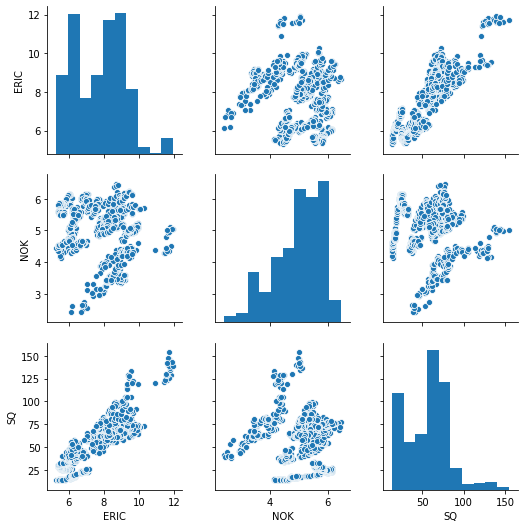

In [40]:
import seaborn as sns
sns.pairplot(portfolio1)

In [8]:
portfolio2.head()

Ticker,DAI.DE,ORCL,REP.MC
Date,,,
2017-01-03,57.499252,36.368214,10.753626
2017-01-04,57.475330,36.547462,10.777294
2017-01-05,57.459385,36.453117,10.793075
2017-01-06,57.451405,36.273872,10.808853
2017-01-09,57.403564,36.821045,10.706287


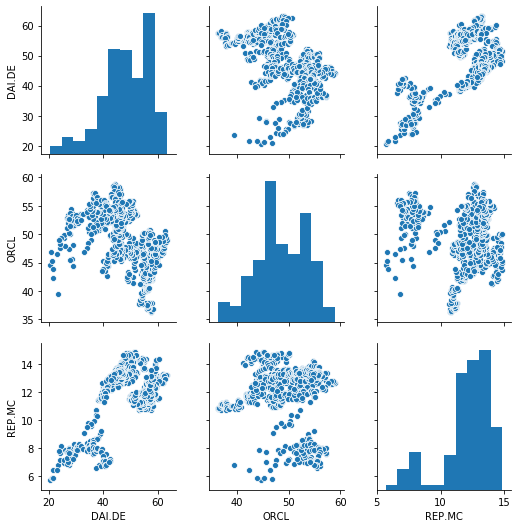

In [43]:
sns.pairplot(portfolio2)

The next step is to calculate different metrics. In order to get the returns we need the daily percentage change of each stock and then
combine them by portfolio to get to the daily portfolio percentage change. Once we have the daily portfolio change we can calculate the cumulative
returns. To measure volatility we will use the standard deviation of the returns over time.

In [9]:
import numpy as np
numstocks=3
portfolio1_weights=np.repeat(1/numstocks,numstocks)
portfolio2_weights=np.repeat(1/numstocks,numstocks)
portfolio1_returns=portfolio1.pct_change().mul(portfolio1_weights,axis=1).sum(axis=1)
portfolio2_returns=portfolio2.pct_change().mul(portfolio2_weights,axis=1).sum(axis=1)
cumulative_returns1=((1+portfolio1_returns).cumprod()-1)
cumulative_returns2=((1+portfolio2_returns).cumprod()-1)
returns1=cumulative_returns1.mean()
returns2=cumulative_returns2.mean()
volatility1=np.sqrt(np.dot(portfolio1_weights.T,np.dot(portfolio1.cov(),portfolio1_weights)))
volatility2=np.sqrt(np.dot(portfolio2_weights.T,np.dot(portfolio2.cov(),portfolio2_weights)))
portfolio1_std=(portfolio1.pct_change().mul(portfolio1_weights,axis=1).sum(axis=1)).std()
portfolio2_std=(portfolio2.pct_change().mul(portfolio2_weights,axis=1).sum(axis=1)).std()

Once we have calculated the different metrics we can have a look at the histogram of the returns of each portfolio.

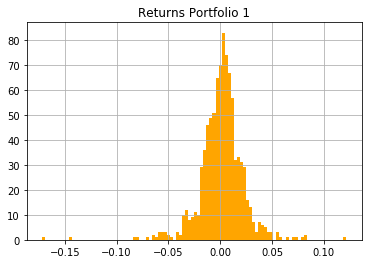

Text(0.5, 1.0, 'Returns Portfolio 2')

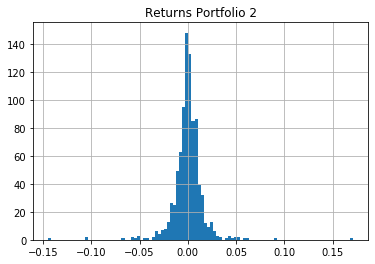

In [34]:
portfolio1_returns.hist(color='orange',bins=100)
plt.title('Returns Portfolio 1')
plt.show()
portfolio2_returns.hist(bins=100)
plt.title('Returns Portfolio 2')

Portfolio 1 is more volatile than Portfolio 2 as Portfolio 2 daily returns tend to be closer to 0. If we compute the skewness of
the returns we will be able to get a better mindmap.

In [28]:
from scipy.stats import skew
print('Skewness Portfolio 1:',skew(portfolio1_returns))
print('Skewness Portfolio 2:',skew(portfolio2_returns))

Skewness Portfolio 1: -0.8463398416446827
Skewness Portfolio 2: 0.02998606776782493


Portfolio 1 returns are negatively skewed. This portfolio has frequent small gains but big loses from time to time. Portfolio 2 returns
are lightly positively skewed instead. Common small losses tend to happen.

The  excess kurtosis of each distribution is useful in this case as it exposes the thickness of the tails. Is a good measure to know
more about the probability for outliers.

In [38]:
from scipy.stats import kurtosis
print('Kurtosis Portfolio 1:',kurtosis(portfolio1_returns))
print('Kurtosis Portfolio 2:',kurtosis(portfolio2_returns))

Kurtosis Portfolio 1: 9.915160529723686
Kurtosis Portfolio 2: 27.617980921682264


From the kurtosis we can tell that Portfolio 2 would have more frequent big gains and big losses.


If we plot the returns and the cumulative returns of each portfolio we would be able to confirm the above mentioned statements and see the profitability of each portfolio.

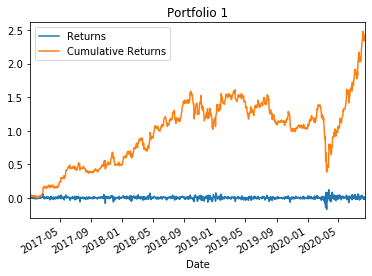

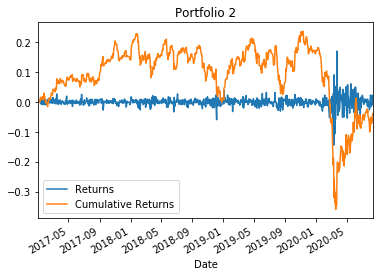

In [45]:
import matplotlib.pyplot as plt
portfolio1_returns.plot(label='Returns')
cumulative_returns1.plot(label='Cumulative Returns')
plt.legend()
plt.title('Portfolio 1')
plt.show()
portfolio2_returns.plot(label='Returns')
cumulative_returns2.plot(label='Cumulative Returns')
plt.title('Portfolio 2')
plt.legend()
plt.show()

Portfolio 1 is more profitable. The pandemic had a huge effect in both portfolios but Portfolio 1 was able to recover and even increase
its value. We can also see how Portfolio 2 has the previously mentioned big gains and losses moments.

Finally a DataFrame with key metrics is exposed. The Sharpe ratio of each portfolio is computed assuming that the return of a free
riks asset is 0%.

In [51]:
index=['Portfolio 1','Portfolio 2']
data={'Returns':[returns1,returns2],'Volatility':[portfolio1_std,portfolio2_std]}
df=pd.DataFrame(data=data,index=index)
risk_free=0
df['Sharpe Ratio']=(df['Returns']-risk_free)/df['Volatility']
MSR=df.sort_values(by=['Sharpe Ratio'],ascending=False)

In [52]:
print(MSR)

              Returns  Volatility  Sharpe Ratio
Portfolio 1  0.978249    0.021003     46.576370
Portfolio 2  0.093203    0.016022      5.817335


Portfolio 1 has a better risk return relation than Portfolio 2. However the final portfolio selection decision depends on the risk
apetite of the investor.

Thank you for your interest !!

David Lobo